In [1]:
import os
import random
import torch
import numpy as np
import pickle as pkl
from analysis import *
import argparse
from sys import platform
%load_ext autoreload
%autoreload 2

In [2]:
torch.manual_seed(12)
torch.cuda.manual_seed(12)
np.random.seed(12)
torch.backends.cudnn.deterministics = True
torch.set_num_threads(1)

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())


print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
2
0
NVIDIA GeForce RTX 3090


In [4]:
# iv: image option
length = 440
channel = 128
min_CNN = 200
n_classes = 40
classes = range(n_classes)


In [5]:
if platform == "linux" or platform == "linux2":
    torch_models_dir = r"/media/mountHDD1/LanxHuyen/CVPR2017"
elif platform == "win32":
    torch_models_dir = r"D:\Data\CVPR2021-02785\CVPR2021-02785\preprocessed\torch_models"
block_splits_all = '/media/mountHDD1/LanxHuyen/CVPR2017/block_splits_by_image_all.pth' 
eeg_raw = '/media/mountHDD1/LanxHuyen/CVPR2017/eeg_55_95_std.pth'
# block_splits_all, block_splits_single, eeg_14_70, eeg_55_95, eeg_5_95, eeg_raw = os.listdir(torch_models_dir)
# print(os.listdir(torch_models_dir))

In [6]:
# eeg_dataset = os.path.join(torch_models_dir, eeg_5_95)
# splits_all_path = os.path.join(torch_models_dir, block_splits_all)
eeg_dataset = eeg_raw
splits_all_path = block_splits_all
print(eeg_dataset,'\n', splits_all_path)

/media/mountHDD1/LanxHuyen/CVPR2017/eeg_55_95_std.pth 
 /media/mountHDD1/LanxHuyen/CVPR2017/block_splits_by_image_all.pth


In [7]:
splits_all = torch.load(splits_all_path)
eeg_loaded = torch.load(eeg_dataset)

In [15]:
print(len(splits_all['splits']))
print(len(splits_all['splits'][0]))

print(len(splits_all['splits'][0]['train']))
print(len(splits_all['splits'][0]['val']))
print(len(splits_all['splits'][0]['test']))
print(splits_all['splits'][0]['train'][:40])
print(splits_all['splits'][1]['train'][:40])
print(splits_all['splits'][2]['train'][:10])
print(splits_all['splits'][3]['train'][:10])
print(splits_all['splits'][0].keys())

6
3
7970
1998
1997
[0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 33, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 51, 52, 54, 55]
[1, 2, 3, 4, 6, 8, 9, 12, 13, 20, 25, 26, 27, 28, 30, 32, 33, 35, 37, 38, 39, 40, 44, 45, 46, 50, 52, 54, 56, 58, 59, 60, 62, 65, 68, 72, 73, 74, 76, 81]
[2, 3, 4, 5, 6, 7, 8, 10, 11, 13]
[1, 2, 4, 7, 9, 10, 12, 13, 14, 15]
dict_keys(['train', 'val', 'test'])


In [27]:
print(len(eeg_loaded))
print(eeg_loaded.keys())
dataset, labels, images = [eeg_loaded[k] for k in eeg_loaded.keys()]
print(len(labels))
print(len(images))
print(len(dataset))

print(*labels)
print(images[0])
print(dataset[0]['eeg'].shape)
print(dataset[0])
#Trial 0-1995 - subject 4
#Trial 1996 - 3980 - subject 1
#Trial 3981 - 5976 - subject 6
#Trial 5977 - 7972 - subject 3
#Trial 7973 - 9968 - subject 2
#Trial 9969 - 11964 - subject 5

3
dict_keys(['dataset', 'labels', 'images'])
40
1996
11965
n02389026 n03888257 n03584829 n02607072 n03297495 n03063599 n03792782 n04086273 n02510455 n11939491 n02951358 n02281787 n02106662 n04120489 n03590841 n02992529 n03445777 n03180011 n02906734 n07873807 n03773504 n02492035 n03982430 n03709823 n03100240 n03376595 n03877472 n03775071 n03272010 n04069434 n03452741 n03792972 n07753592 n13054560 n03197337 n02504458 n02690373 n03272562 n04044716 n02124075
n02951358_31190
torch.Size([128, 500])
{'eeg': tensor([[-2.9181e-02, -2.9862e-01, -5.1430e-01,  ..., -8.4631e-01,
         -4.8041e-01, -2.8394e-02],
        [-2.4111e-02, -1.6960e-01, -2.8707e-01,  ..., -5.6212e-01,
         -3.2735e-01, -3.5872e-02],
        [ 4.7802e-02,  3.7646e-01,  6.4149e-01,  ...,  4.3011e-01,
          2.4678e-01,  4.1414e-02],
        ...,
        [ 2.1368e-02,  1.2907e-01,  1.9428e-01,  ...,  7.4598e-01,
          4.1789e-01, -9.6936e-03],
        [ 9.9196e-04, -1.1907e-02, -2.2160e-02,  ...,  2.7170e-02,
  

In [17]:
removed_labels_idx = [i for i in range(len(dataset)) if dataset[i]['label'] == 33] 
print(len(removed_labels_idx))
# print(removed_labels_idx)

283


In [14]:
train_splits, val_splits, test_splits = [splits_all['splits'][0][k] for k in splits_all['splits'][0].keys()]
train_splits = [sample for sample in train_splits if sample not in removed_labels_idx]
val_splits = [sample for sample in val_splits if sample not in removed_labels_idx]
test_splits = [sample for sample in test_splits if sample not in removed_labels_idx]

In [30]:
print(len(train_splits))
print(len(val_splits))
print(len(test_splits))
output_splits = {"train": train_splits, "val": val_splits, "test": test_splits}
# output_path_dir = '/media/mountHDD1/LanxHuyen/CVPR2017'
# torch.save(splits, os.path.join(output_path_dir, "splits_by_image_removed_33.pth"))

7776
1956
1950


In [26]:
images_idx = np.array([dataset[idx]['image'] for idx in train_splits]) # => len(images_idx) = len(dataset)
grouped_images_idx = np.array([np.where(images_idx == image)[0] for image in np.unique(images_idx)])
print(grouped_images_idx.shape)
print(grouped_images_idx[:5])

(1296, 6)
[[   0 1296 2592 3888 5184 6480]
 [   1 1297 2593 3889 5185 6481]
 [   2 1298 2594 3890 5186 6482]
 [   3 1299 2595 3891 5187 6483]
 [   4 1300 2596 3892 5188 6484]]


In [31]:
#Generate splits by subject
splits = output_splits
result_splits = {}
for key, split in splits.items():
    images_idx = np.array([dataset[idx]['image'] for idx in split]) # => len(images_idx) = len(split)
    grouped_images_idx = np.array([np.where(images_idx == image)[0] for image in np.unique(images_idx)]) #(split_len, 6)
    result_splits[key] = grouped_images_idx
torch.save(result_splits, os.path.join(output_path_dir, "splits_by_subject.pth"))

In [29]:
result_splits['train'].shape

(1330,)

In [54]:
#subject 4: 0 - 1946
#subject 1: 1947 - 3893
#subject 6: 3894 - 5840
#subject 3: 5841 - 7787
#subject 2: 7788 - 9734
#subject 5: 9735 - 11681
print(new_dataset[9735])

{'eeg': tensor([[ 4.3154e-02,  4.7046e-01,  8.1451e-01,  ...,  1.6328e+00,
          8.9757e-01, -7.6260e-03],
        [ 1.4745e-01,  1.9753e+00,  3.4403e+00,  ...,  5.4654e+00,
          2.9874e+00, -4.0782e-02],
        [-6.0167e-02, -9.1679e-01, -1.6048e+00,  ..., -2.1591e+00,
         -1.1712e+00,  2.4655e-02],
        ...,
        [-1.3750e-01,  8.1950e-01,  1.6004e+00,  ..., -1.4219e+00,
         -7.1263e-01,  1.4110e-01],
        [-5.2204e-03,  3.1537e-02,  6.1560e-02,  ..., -6.2863e-02,
         -3.1441e-02,  6.4427e-03],
        [-3.5359e-02,  2.2381e-01,  4.3285e-01,  ..., -3.6406e-01,
         -1.8280e-01,  3.6625e-02]]), 'image': 0, 'label': 10, 'subject': 5}


In [55]:
eeg_dataset = [sample['eeg'] for sample in new_dataset]
print(eeg_dataset[0])

tensor([[-2.9181e-02, -2.9862e-01, -5.1430e-01,  ..., -8.4631e-01,
         -4.8041e-01, -2.8394e-02],
        [-2.4111e-02, -1.6960e-01, -2.8707e-01,  ..., -5.6212e-01,
         -3.2735e-01, -3.5872e-02],
        [ 4.7802e-02,  3.7646e-01,  6.4149e-01,  ...,  4.3011e-01,
          2.4678e-01,  4.1414e-02],
        ...,
        [ 2.1368e-02,  1.2907e-01,  1.9428e-01,  ...,  7.4598e-01,
          4.1789e-01, -9.6936e-03],
        [ 9.9196e-04, -1.1907e-02, -2.2160e-02,  ...,  2.7170e-02,
          1.5099e-02, -3.4801e-04],
        [ 2.7840e-03, -3.7217e-02, -7.2385e-02,  ...,  1.1830e-01,
          6.4887e-02, -6.0881e-03]])


In [57]:
import torch
import torch.nn.functional as F
import cv2
output_directory = '/media/mountHDD1/LanxHuyen/CVPR2017'
# Define constants
# input_shape = (512, 440, 3)  # Original EEG image shape
output_shape = (512, 440)  # Resized image shape
# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)
# Placeholder for your EEG-ImageNet dataset
# Extract EEG data from the dictionary list
eeg_data_list = [sample['eeg'] for sample in new_dataset]

# Convert EEG data list to PyTorch tensors
eeg_tensors = [torch.tensor(data, dtype=torch.float32) for data in eeg_data_list]

# Method 1: Creating grayscale heatmaps for each trial
def process_method_1(eeg_data):
    normalized_data = (eeg_data - eeg_data.min()) / (eeg_data.max() - eeg_data.min())
    grayscale_images = (normalized_data * 255).to(torch.uint8)
    stacked_images = grayscale_images.unsqueeze(0).repeat(1, 1, 1, 1)  # Stack 3 times along the channel axis
    resized_images = F.interpolate(stacked_images, size=output_shape[:2], mode='bilinear', align_corners=False)
    return resized_images[0].squeeze(0)
# Apply method 1 to each tensor in eeg_tensors
processed_images = [process_method_1(eeg_tensor) for eeg_tensor in eeg_tensors]

print("Processed Images Shape:", [img.shape for img in processed_images])
# # Apply method 1 to each tensor in eeg_tensors
# processed_images = [process_method_1(eeg_tensor) for eeg_tensor in eeg_tensors]
# # Concatenate processed images along a new dimension
# concatenated_images = torch.stack(processed_images)
# # Save the concatenated tensor as a .pth file
# output_filename = os.path.join(output_directory, "eeg_heatmaps_55_95.pth")
# torch.save(concatenated_images, output_filename)

/tmp/ipykernel_5059/4121241431.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eeg_tensors = [torch.tensor(data, dtype=torch.float32) for data in eeg_data_list]


Processed Images Shape: [torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512, 440]), torch.Size([512

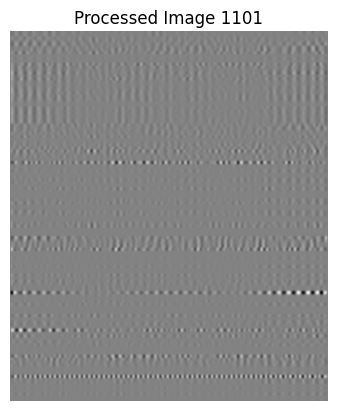

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already processed the images using the process_method_1 function
# processed_images = [process_method_1(eeg_tensor) for eeg_tensor in eeg_tensors]

# Choose the index of the image you want to plot (e.g., index 0)
image_index = 1100

# Convert the processed image to a numpy array and transpose dimensions
# numpy_image = processed_images[image_index].numpy().transpose(1, 2, 0)
numpy_image = processed_images[image_index].numpy()

# Plot the processed image
plt.imshow(numpy_image, cmap='gray')  # Display as grayscale
plt.title(f"Processed Image {image_index + 1}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
eeg_length = np.zeros(len(dataset))
for i in range(len(dataset)):
    eeg_length[i] = list(dataset[i]['eeg'].size())[1]

In [ ]:
sub_length = np.empty(len(dataset))
for i in range(len(dataset)):
    sub_length[i] = dataset[i]['subject']

In [ ]:
# print(dataset['eeg'].size())
import torch.nn.functional as F
desired_size = 500

new_dataset = torch.zeros(len(dataset), 128, desired_size)

for i in range(len(dataset)):
    eeg_data = dataset[i]['eeg']

    # Convert the tensor to torch.float32
    eeg_data_float = eeg_data.to(torch.float32)

    # Resize using linear interpolation
    resized_eeg = F.interpolate(eeg_data_float.unsqueeze(0), size=desired_size, mode='linear')

    # Convert the resized tensor back to the original data type (if needed)
    resized_eeg = resized_eeg.to(eeg_data.dtype)

    new_dataset[i, :, :] = resized_eeg.squeeze(0)

In [ ]:
new_dataset.size()

In [ ]:
for j in range(1996):
    filtered_dataset_4 = new_dataset[j]
for k in range(1996,3980):
    filtered_dataset_1 = new_dataset[k]
for l in range(3981,5976):
    filtered_dataset_6 = new_dataset[l]
for m in range(5977,7972):
    filtered_dataset_3 = new_dataset[m]
for n in range(7973,9968):
    filtered_dataset_2 = new_dataset[n]
for o in range(9969,11964):
    filtered_dataset_5 = new_dataset[o]

In [ ]:
print(filtered_dataset_4.size())
print(filtered_dataset_1.size())
print(filtered_dataset_6.size())
print(filtered_dataset_3.size())
print(filtered_dataset_2.size())
print(filtered_dataset_5.size())

In [ ]:
filtered_dataset = torch.stack((filtered_dataset_4,filtered_dataset_1,filtered_dataset_6,filtered_dataset_3,filtered_dataset_2,filtered_dataset_5),dim = 0)

In [ ]:
filtered_dataset.size()

In [ ]:
print(filtered_dataset)

In [ ]:
# for i in range(len(new_dataset)):
#     image_index = dataset[i]['image']
#     subject_index = dataset[i]['subject']
#     filtered_dataset[subject_index-1, :, :] = new_dataset[image_index]

In [ ]:
keys = ('eeg', 'images', 'label')
for i in range(len(new_dataset)):
    value = (filtered_dataset, dataset

In [ ]:
# for i in range(len(dataset)):
#     # Normalize each component using mean and stddev
#    new_dataset[i, :, :] = (new_dataset[i, :, :] - means) / stddevs

In [ ]:
# print(new_dataset.size())
# print(new_dataset[0])

# import matplotlib.pyplot as plt
# plt.plot(new_dataset[0][0])

In [ ]:
heatmap_image = filtered_dataset

In [ ]:
heatmap_image.size()

In [ ]:
# Normalize the heatmap image to [0, 255]
heatmap_image_normalized = ((heatmap_image - heatmap_image.min()) /
                            (heatmap_image.max() - heatmap_image.min()) * 255).byte()

In [ ]:
# Convert the tensor to a NumPy array for plotting
heatmap_image_np = heatmap_image_normalized.numpy()

# Display the heatmap image
plt.imshow(heatmap_image_np, cmap='gray')
plt.title("EEG Grayscale Heatmap Image")
plt.colorbar()
plt.show()

In [ ]:
print(heatmap_image_np)
print(heatmap_image_np.shape)

In [ ]:
for i in range(len(dataset)):
    dataset[i]['eeg'] = new_dataset[i]

In [ ]:
print(dataset[2])

In [ ]:
opt = {
    # Dataset options
#     "iv": "image",
#     "offset": None,
    "results_file": "results.pkl",
    "subject": 0,
    "time_low": 20,
    "time_high": 460,
#     "run": "none",
    "eeg_dataset": eeg_dataset,
    "model_type": "model10",
    "splits_path": splits_all_path,
    "split_num": 0,
    "split_name": "train",
#     "fold": 5,
    #Training options
    "batch_size": 16,
    "optim": "Adam",
    "learning_rate": 0.001,
    "learning_rate_decay_by": 0.5,
    "learning_rate_decay_every": 10,
    "epochs": 100,
    "GPUindex": 0,
    "kind":"from-scratch",
    #Backend options
    "no_cuda": False,
    "classifier": None
}
opt = argparse.Namespace(**opt)
print(opt)

In [ ]:
%load_ext autoreload
%autoreload 2
from torch.utils.data import DataLoader
# from data_loader import EEGDataset, Splitter, SplitterWithData
from data_loader_CVPR2017 import EEGDataset, Splitter
from EEG_Encoder.LSTM import classifier_LSTM
from EEG_Encoder.CNN import classifier_CNN
from EEG_Encoder.EEGNet import classifier_EEGNet
from EEG_Encoder.SyncNet import classifier_SyncNet
from EEG_Encoder.EEGChannelNet import classifier_EEGChannelNet
from EEG_Encoder.net_generator import Classifier
from EEG_Encoder.net_trainer import net_trainer
from p_values import *
from torchinfo import summary

In [ ]:
def load_dataset(
#              offset,
             eeg_dataset,
             splits_path,
             split_num, # (0-5) - 6 fold cross validation
#              total, 
#              classes,
#              classifier,
             batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             kind="from-scratch"):        
    # Load dataset
    dataset = EEGDataset(opt, eeg_dataset)
    print("DONE: LOAD DATASET")
#     # Create loaders for LSTM/MLP/CNN/SCNN/EEGNet/SyncNet/EEGChannelNet
#     if kind=="from-scratch":
#         relabel = False
#     if kind=="incremental":
#         relabel = False
#     if kind=="no-model-file":
#         relabel = True
    splitter = {split: Splitter(dataset,
                    splits_path,
                    split_num,
                    split_name=split) for split in ["train", "val", "test"]}
    loaders = {split: DataLoader(
                        splitter[split],
                        batch_size = batch_size,
                        drop_last = False,
                        shuffle = True)
                    for split in ["train", "val", "test"]}
    channel_idx = None    
    print("DONE: Create loaders for model")            
    return dataset, loaders, splitter

In [ ]:
# Options
opt.classifier = "LSTM4"
opt.batch_size = 16
# opt.kind = "from-scratch"
# opt.run = "imagenet40-1000"
# opt.fold = 5

In [ ]:
dataset, loaders, splitter = load_dataset(
#              offset,
             opt.eeg_dataset,
             opt.splits_path,
             opt.split_num, # (0-5) - 6 fold cross validation
#              total, 
#              classes,
#              classifier,
             opt.batch_size,
#              GPUindex,
#              length, # 500
#              channel, # 128
#              min_CNN,
             opt,
             opt.kind)

In [ ]:
# loaders: divide the splits data in each fold with batch_size
# Each fold has {train: 8000 idx, val: 2000 idx, test: 2000 idx}
# Each loader batch has {train: 2000 idx, val: 250 idx, test: 250 idx}
print(type(dataset))
print(type(loaders))
print(len(loaders), [len(loaders[name]) for name in ["train", "val", "test"] ])
# for i, (input, target) in enumerate(loaders["train"]):
#     if i<20:
#         print(f"{i+1}: Target size: {target.size()}; input size: {input.size()}")
for i in range(0, 40):
    eeg, label_val = splitter["val"][i]
    eeg, label_train = splitter["train"][i]
    print(f"{i+1}: Label val: {label_val}; label train: {label_train}")


In [ ]:
net, nonclasses = Classifier(
                 n_classes,
                 classes,
                 opt.classifier,
                 opt.GPUindex,
                 length,
                 channel,
                 min_CNN,
                 opt.kind)
# print(len(nonclasses))
summary(net, input_size=(1,128, 440))

In [ ]:
model_path = (   "CVPR2017-" +
                  opt.classifier+
                  "-"+
                  str(length)+
                  "-"+
                  str(channel)+
                  "-"+
                  'Retest' )
print(model_path)

In [ ]:
print(opt)

In [ ]:
channel_idx=None
non_classes=None
if opt.kind=="from-scratch":
    results = net_trainer(
            net,
            loaders,
            opt,
            channel_idx,
            nonclasses,
            None,
            True,
            model_path,
            print_every_train = 100,
            print_every_val = 125)

Train Batch 100 (every 100 batch): Loss=0.1550; accuracy=0.9006
Train Batch 200 (every 100 batch): Loss=0.3906; accuracy=0.9047
Train Batch 300 (every 100 batch): Loss=0.3261; accuracy=0.9083
Train Batch 400 (every 100 batch): Loss=0.6428; accuracy=0.9066
Epoch 47 summary: train_loss: 0.3177 | train_acc: 0.9004 | val_loss: 4.7394 | val_acc: 0.2010
Epoch 48
Train Batch 100 (every 100 batch): Loss=0.1733; accuracy=0.9169
Train Batch 200 (every 100 batch): Loss=0.3384; accuracy=0.9178
Train Batch 300 (every 100 batch): Loss=0.1867; accuracy=0.9167
Train Batch 400 (every 100 batch): Loss=0.6507; accuracy=0.9172
Epoch 48 summary: train_loss: 0.2767 | train_acc: 0.9110 | val_loss: 4.8376 | val_acc: 0.2001
Epoch 49
Train Batch 100 (every 100 batch): Loss=0.4388; accuracy=0.9013
Train Batch 200 (every 100 batch): Loss=0.1834; accuracy=0.8944
Train Batch 300 (every 100 batch): Loss=0.8391; accuracy=0.8906
Train Batch 400 (every 100 batch): Loss=0.2250; accuracy=0.8869
Epoch 49 summary: train_lo

Train Batch 100 (every 100 batch): Loss=0.4704; accuracy=0.8187
Train Batch 200 (every 100 batch): Loss=0.2372; accuracy=0.8181
Train Batch 300 (every 100 batch): Loss=0.2904; accuracy=0.8152
Train Batch 400 (every 100 batch): Loss=0.2112; accuracy=0.8194
Epoch 70 summary: train_loss: 0.5636 | train_acc: 0.8289 | val_loss: 5.8814 | val_acc: 0.2016
Epoch 71
Train Batch 100 (every 100 batch): Loss=0.3092; accuracy=0.9256
Train Batch 200 (every 100 batch): Loss=0.3137; accuracy=0.9300
Train Batch 300 (every 100 batch): Loss=0.0731; accuracy=0.9383
Train Batch 400 (every 100 batch): Loss=0.2065; accuracy=0.9442
Epoch 71 summary: train_loss: 0.1714 | train_acc: 0.9450 | val_loss: 5.7815 | val_acc: 0.2046
Epoch 72
Train Batch 100 (every 100 batch): Loss=0.0299; accuracy=0.9656
Train Batch 200 (every 100 batch): Loss=0.0485; accuracy=0.9716
Train Batch 300 (every 100 batch): Loss=0.0297; accuracy=0.9727
Train Batch 400 (every 100 batch): Loss=0.0633; accuracy=0.9722
Epoch 72 summary: train_lo

Train Batch 100 (every 100 batch): Loss=0.0293; accuracy=0.9712
Train Batch 200 (every 100 batch): Loss=0.0162; accuracy=0.9678
Train Batch 300 (every 100 batch): Loss=0.1756; accuracy=0.9677
Train Batch 400 (every 100 batch): Loss=0.0787; accuracy=0.9627
Epoch 93 summary: train_loss: 0.1430 | train_acc: 0.9585 | val_loss: 6.7716 | val_acc: 0.2149
Epoch 94
Train Batch 100 (every 100 batch): Loss=0.0577; accuracy=0.9700
Train Batch 200 (every 100 batch): Loss=0.1885; accuracy=0.9656
Train Batch 300 (every 100 batch): Loss=0.1342; accuracy=0.9652
Train Batch 400 (every 100 batch): Loss=0.3027; accuracy=0.9586
Epoch 94 summary: train_loss: 0.1505 | train_acc: 0.9534 | val_loss: 7.1981 | val_acc: 0.1959
Epoch 95
Train Batch 100 (every 100 batch): Loss=0.1803; accuracy=0.9500
Train Batch 200 (every 100 batch): Loss=0.0802; accuracy=0.9528
Train Batch 300 (every 100 batch): Loss=0.0852; accuracy=0.9508
Train Batch 400 (every 100 batch): Loss=0.0628; accuracy=0.9506
Epoch 95 summary: train_lo

In [ ]:
# val = results["val_acc"]
# # test = results["test_acc"]

# print("Validation accuracy: ", val)
# # print("Test accuracy: ", test)

In [ ]:
print(accuracy_val)